In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np

import cv2
import os
import glob


Using TensorFlow backend.


In [2]:

path_daniel='image/Daniel'
path_chris='image/Chris'
path_unkno='image/unknown'

la=len(os.listdir(path_daniel))
lb=len(os.listdir(path_chris))     
lc=len(os.listdir(path_unkno)) 

print('Daniel 경로에 저장된 파일의 개수:'+str(la))
print('Chris 경로에 저장된 파일의 개수:'+str(lb))
print('Chris 경로에 저장된 파일의 개수:'+str(lc))

Daniel 경로에 저장된 파일의 개수:2259
Chris 경로에 저장된 파일의 개수:1663
Chris 경로에 저장된 파일의 개수:1236


### 불러온 이미지의 사이즈 결정하기 위한 값

In [3]:
xsize=150
ysize=150

### 불러온 이미지에 라벨(label)을 붙이기 위한 함수와 이미지 크기 조절과 255 값으로 나누어 정규화

In [4]:
x=[]
y=[]

from keras.preprocessing import image
import numpy as np

def read_dir(path, label):
    
    files = glob.glob(path + "\\/*.jpg")
    if bool(files) == False:
        files = glob.glob(path + "\\/*.png") 
     
    for f in files:

        try:
            img = image.load_img(f, target_size=(xsize,ysize))
            img_tr= image.img_to_array(img)        
            img_tr /= 255.
            
            y.append(label)
            x.append(img_tr)
        except:
            pass

### 경로에 들어있는 파일을 읽어서 각각에 라벨 붙이기

In [5]:
read_dir(path_daniel, 0) #'DanielCraig')
read_dir(path_chris, 1) #'ChrisEvans')
read_dir(path_unkno, 2) #'Unknown')

### 리스트로 저장한 x,y를 딥러닝을 위해 Numpy 배열로 변환

In [6]:
x=np.array(x)
y=np.array(y)

**Numpy로 변환한 x,y를 train, test 셋으로 분리  
batch_size: 미니배치 사이즈 결정  
num_classes: 분류하고자 하는 클래스의 개수  
epochs: 총 연산횟수 결정**  

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

input_shape = (xsize,ysize, 3)

batch_size = 50
num_classes = 3
epochs = 15

**label인 y를 카테고리화**

In [8]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
# model = Sequential()

# model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
#                  activation='relu',
#                  input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# #model.add(Dropout(0.25))

# model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# #model.add(Dropout(0.5))

# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.25))
# model.add(Dense(num_classes, activation='softmax'))
# model.summary()


# 딥러닝 모델 작성  
**Input shape**는 위에서 정한 (xsize, ysize, channel) 순서대로 입력해준다.  
**model.summary()**를 참고하면 CNN의 구조를 확인할 수 있다.

In [10]:
model= Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(150, 150,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
          
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu')) #layers.Dense() : densely-connected NN layer
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5)) #드롭아웃 사용여부
model.add(Dense(num_classes, activation='softmax')) 

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
________________________________________________

# Model을 이미지 파일로 저장

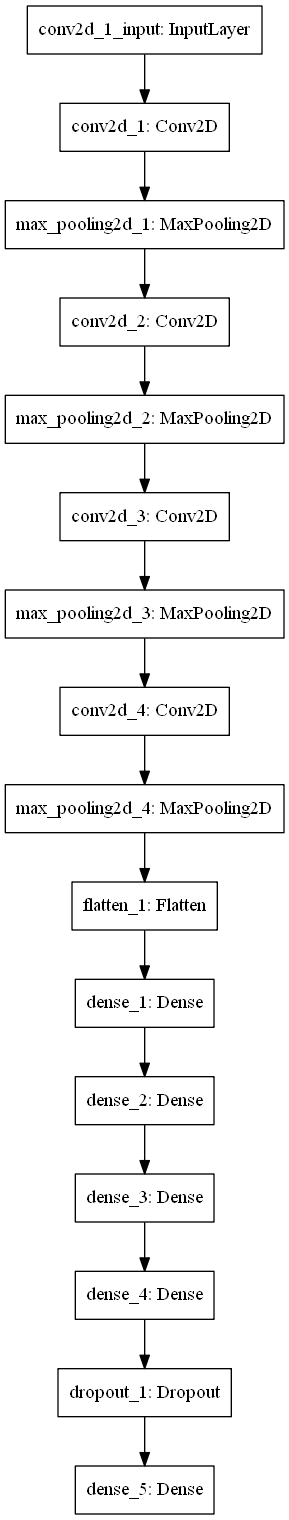

In [11]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

**pydot을 설치하면 진행 과정을 이미지화 할 수 있다.**

In [12]:
# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot
# import matplotlib.pyplot as plt

# %matplotlib inline

# plt.figure(figsize=(20, 10)) 
# SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))


# 모델 실행 과정
**정확도와 loss를 확인할 수 있다. Loss가 감소하는지 여부에 대해 확인할 필요가 있다.**  
**이 모델에는 validation_data 설정하였다.**  
**batch_size, epochs는 위에서 정의**  

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 4642 samples, validate on 516 samples
Epoch 1/15
4642/4642 [==============================] - 79s 17ms/step - loss: 1.0312 - accuracy: 0.4612 - val_loss: 0.8411 - val_accuracy: 0.6337
Epoch 2/15
4642/4642 [==============================] - 83s 18ms/step - loss: 0.7373 - accuracy: 0.6993 - val_loss: 0.5532 - val_accuracy: 0.7868
Epoch 3/15
4642/4642 [==============================] - 84s 18ms/step - loss: 0.4588 - accuracy: 0.8382 - val_loss: 0.3496 - val_accuracy: 0.8818
Epoch 4/15
4642/4642 [==============================] - 84s 18ms/step - loss: 0.3471 - accuracy: 0.8761 - val_loss: 0.3870 - val_accuracy: 0.8779
Epoch 5/15
4642/4642 [==============================] - 83s 18ms/step - loss: 0.2926 - accuracy: 0.8985 - val_loss: 0.2908 - val_accuracy: 0.8934
Epoch 6/15
4642/4642 [==============================] - 83s 18ms/step - loss: 0.2475 - accuracy: 0.9121 - val_loss: 0.3042 - val_accuracy: 0.8818
Epoch 7/15
4642/4642 [=======

### 위 연산은 training data로 결정한 Loss와 Accuray이다.
### 아래 연산은 test data를 가지고 한 결과

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3721110118658403
Test accuracy: 0.9166666865348816


In [19]:
history = model.fit(x_train, y_train, batch_size=50, epochs=15, validation_split=0.1) 

Train on 4177 samples, validate on 465 samples
Epoch 1/15
4177/4177 [==============================] - 75s 18ms/step - loss: 0.0519 - accuracy: 0.9832 - val_loss: 0.1442 - val_accuracy: 0.9505
Epoch 2/15
4177/4177 [==============================] - 76s 18ms/step - loss: 0.0655 - accuracy: 0.9794 - val_loss: 0.1140 - val_accuracy: 0.9613
Epoch 3/15
4177/4177 [==============================] - 77s 18ms/step - loss: 0.0638 - accuracy: 0.9820 - val_loss: 0.0766 - val_accuracy: 0.9763
Epoch 4/15
4177/4177 [==============================] - 76s 18ms/step - loss: 0.0413 - accuracy: 0.9859 - val_loss: 0.0751 - val_accuracy: 0.9677
Epoch 5/15
4177/4177 [==============================] - 75s 18ms/step - loss: 0.0279 - accuracy: 0.9902 - val_loss: 0.0499 - val_accuracy: 0.9785
Epoch 6/15
4177/4177 [==============================] - 75s 18ms/step - loss: 0.0705 - accuracy: 0.9765 - val_loss: 0.1458 - val_accuracy: 0.9484
Epoch 7/15
4177/4177 [==============================] - 76s 18ms/step - loss:

In [23]:
dir(history.history)

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

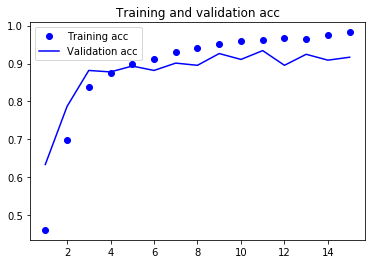

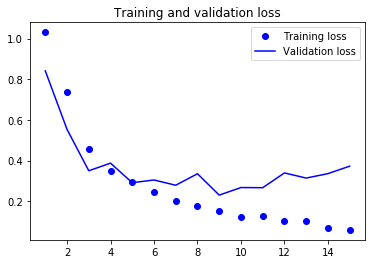

In [26]:
import matplotlib.pyplot as plt

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss= hist.history['val_loss']

epochs=range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()

위에서 연산한 모델을 저장하면 반복해서 연산할 필요없이 모델만 불러와서 실행하면 된다.

In [15]:
from keras.models import load_model
model.save('face_detection_js.h5')